In [1]:
# Feb 18 2019
# Shaojun Yu
# Python 3.7

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1 = [0,0]
x2 = [2,1]
mu1 = [2, 2]
mu2 = [1, 1]
sigma1 = [[0.5, 0], [0, 0.5]]
sigma2 = [[1, -0.5], [-0.5, 1]]
c1 = multivariate_normal(mu1, sigma1)
c2 = multivariate_normal(mu2, sigma2)

In [3]:
p_x1 = c1.pdf(x1) * 1/3 + c2.pdf(x1) *2/3
p_x2 = c1.pdf(x2) * 1/3 + c2.pdf(x2) *2/3

In [4]:
p_w1_x1 = c1.pdf(x1) * 1/3 / p_x1
p_w1_x1

0.0021420640663864154

In [5]:
p_w1_x2 = c1.pdf(x2) * 1/3 / p_x2
p_w1_x2

0.3829195783380293

In [6]:
# Make data.
X = np.arange(-5, 7, 0.1)
Y = np.arange(-5, 7, 0.1)

Z1 = np.zeros((len(X), len(Y)))
Z2 = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        Z1[i,j] = c1.pdf([X[i], Y[j]]) * 1/3
        Z2[i,j] = c2.pdf([X[i], Y[j]]) * 2/3
X, Y = np.meshgrid(X, Y)

Text(0.5,0,'X2')

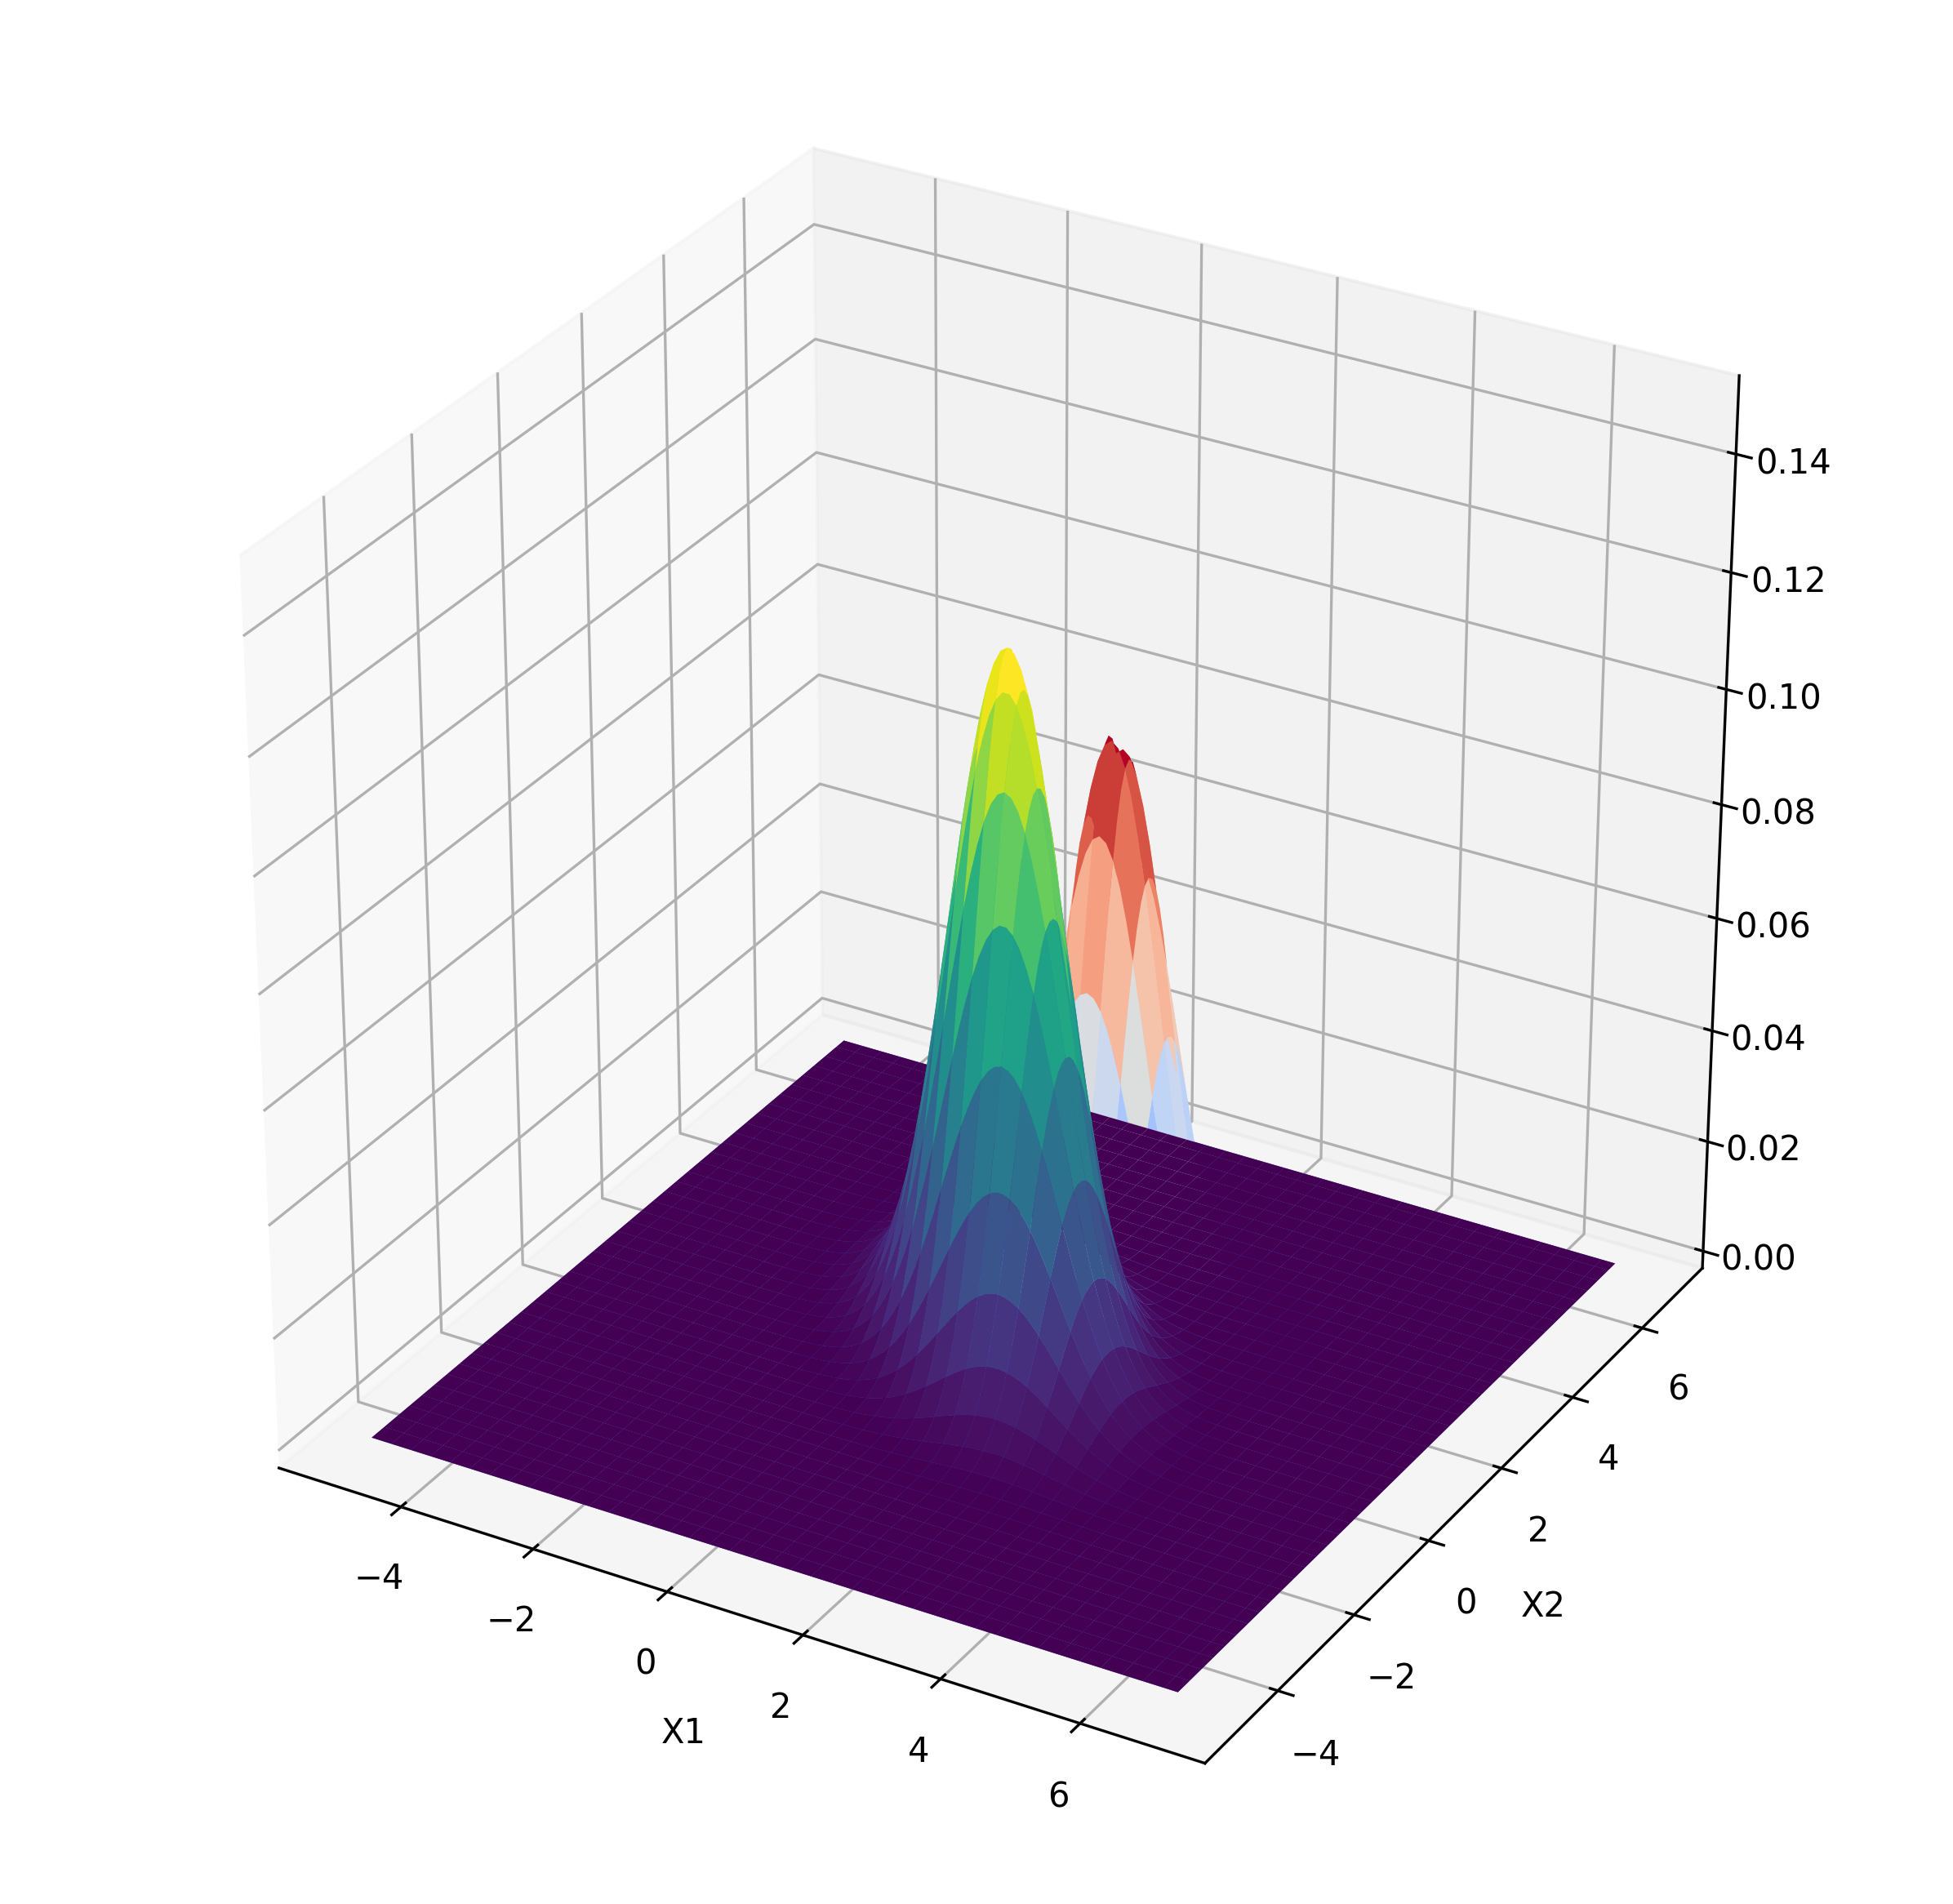

In [26]:
# Create a surface plot and projected filled contour plot under it.
# rstride=3, cstride=3, linewidth=1, antialiased=True,
fig = plt.figure(figsize=(10, 10),dpi=300)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z1,cmap=cm.coolwarm)
ax.plot_surface(X, Y, Z2,cmap=cm.viridis)

ax.set_zlim(0,0.15)
# ax.view_init(10, -200)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

Text(0.5,0.92,'Decision boundary')

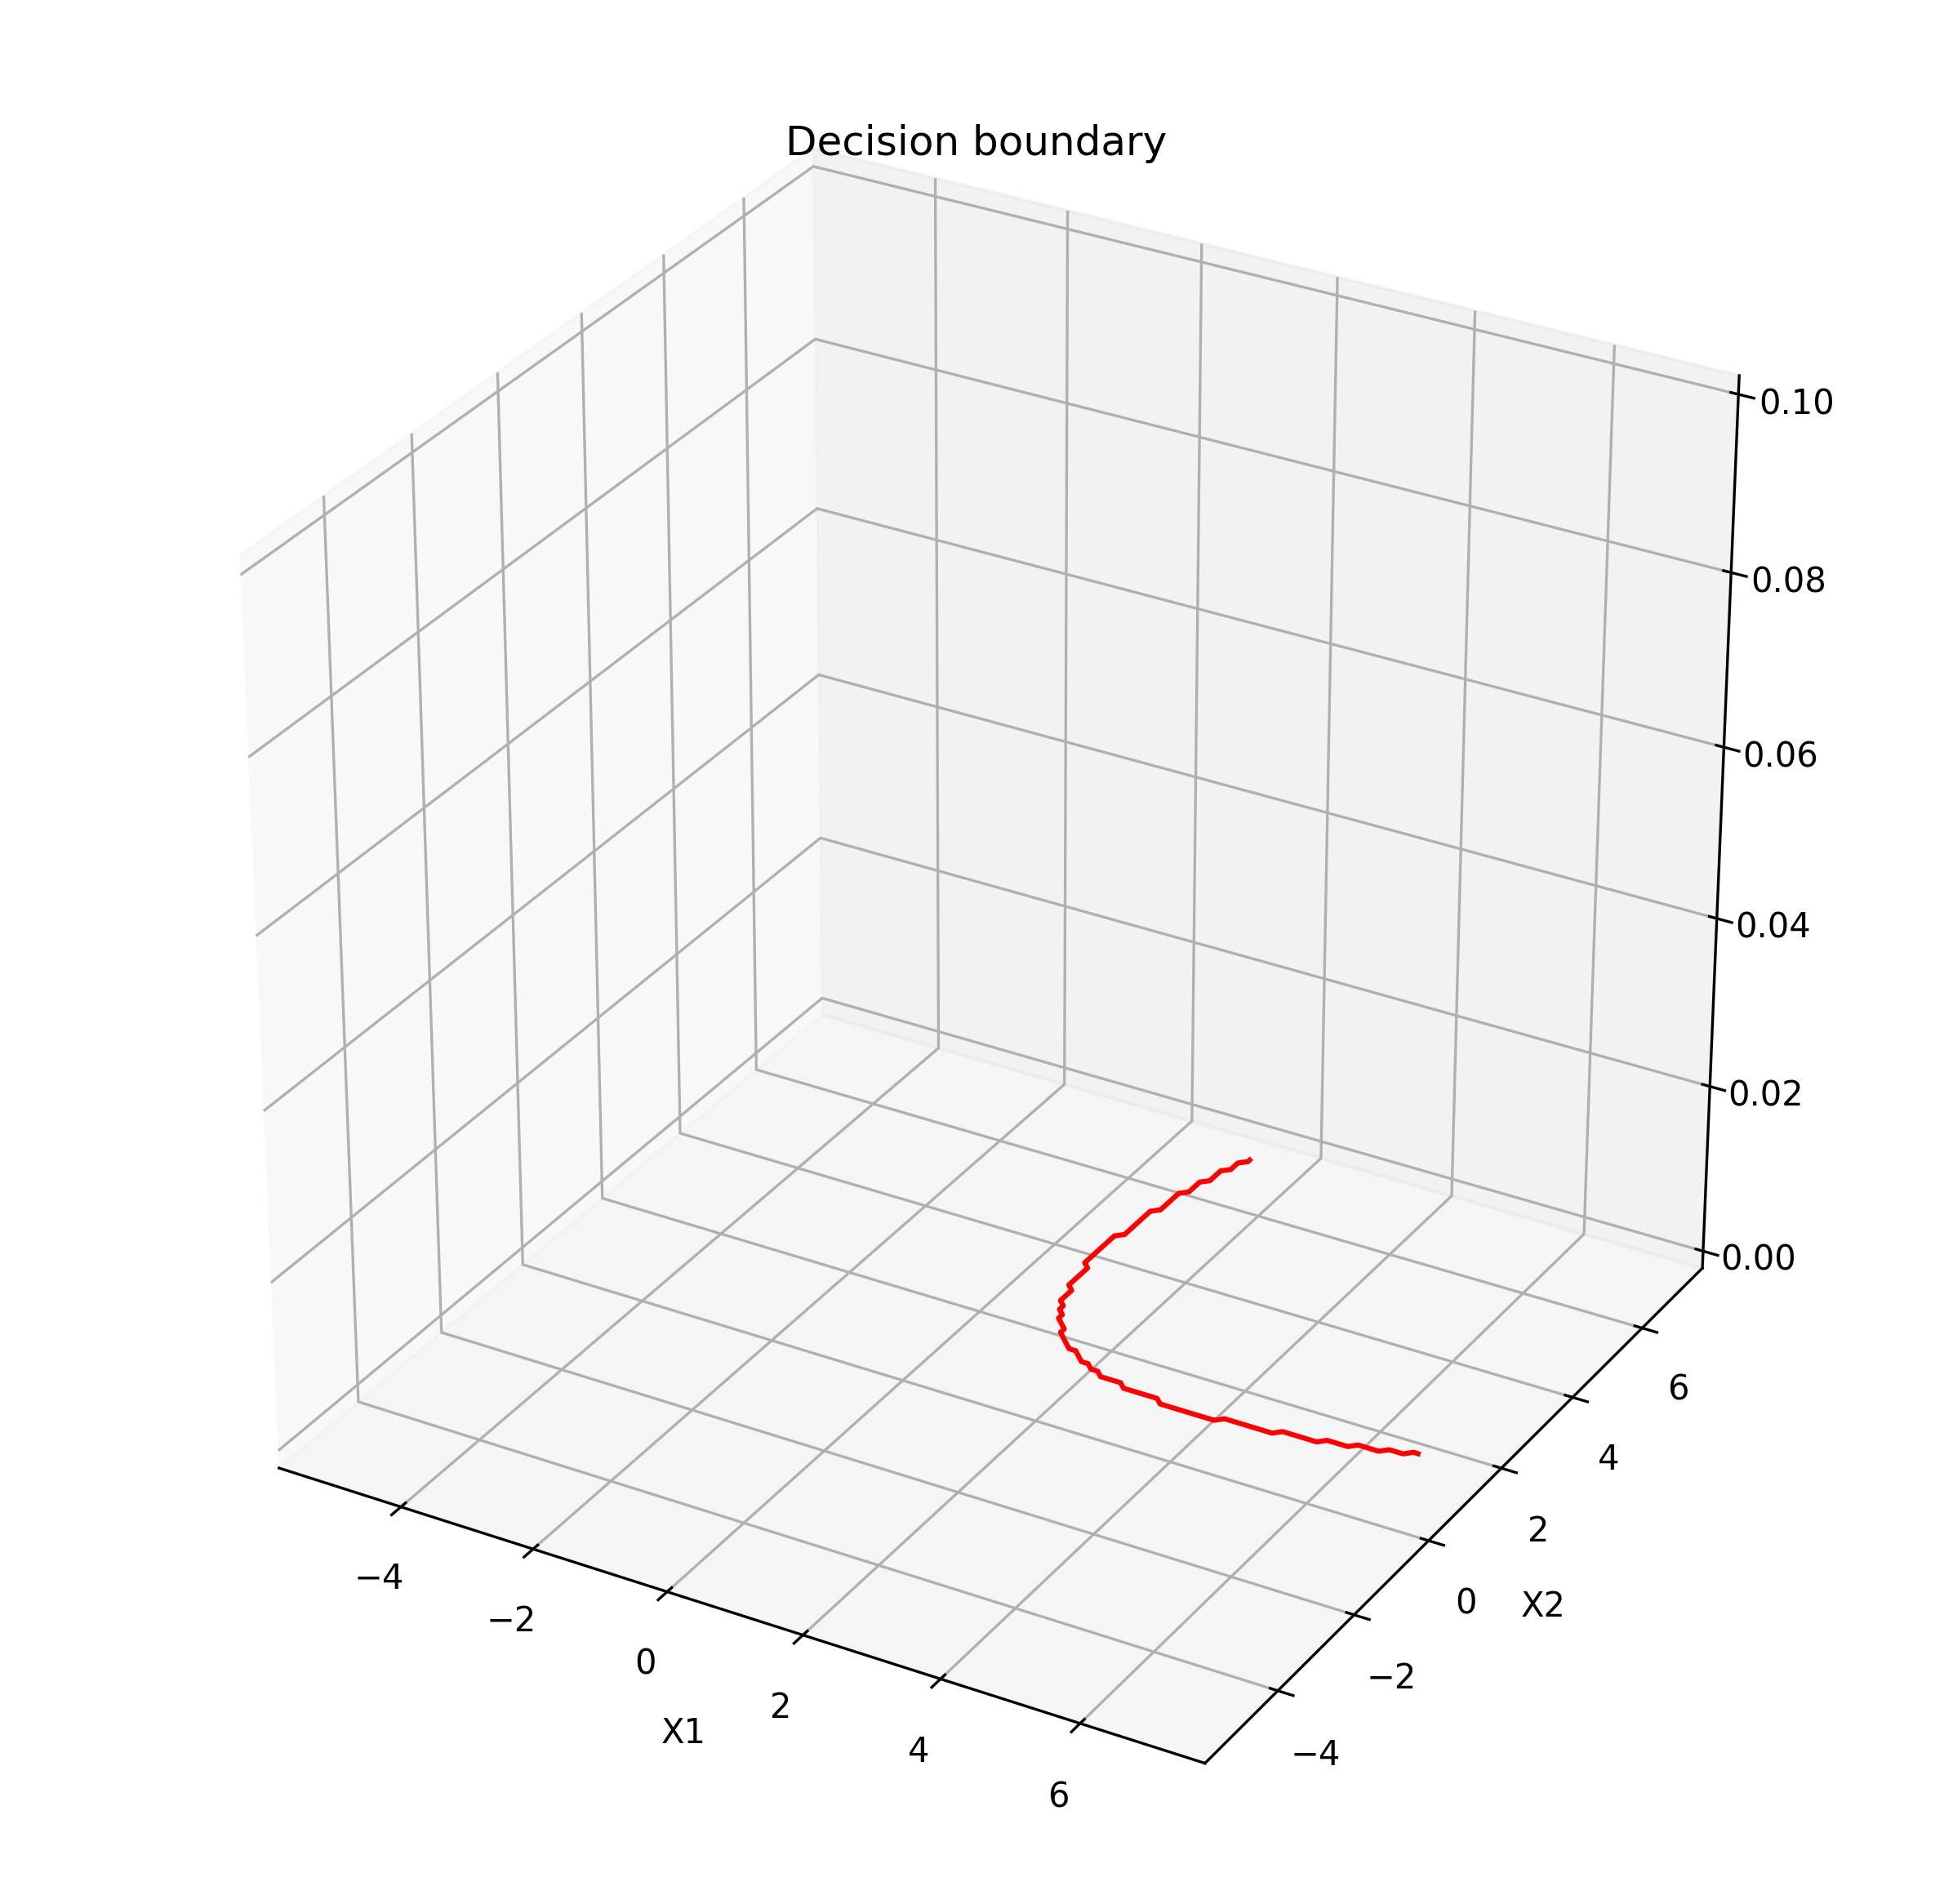

In [29]:
Z = (Z1-Z2)
Z[Z<0] = -1000
fig = plt.figure(figsize=(10, 10),dpi=300)
ax = fig.gca(projection='3d')
ax.contour(X,Y,Z,colors='r')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlim(0,0.1)
ax.set_title('Decision boundary')